In [1]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline 
from sklearn.datasets import load_files
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#DATA_DIR = './raw/'
DATA_DIR = './cleanRaw/'

In [2]:
docs_data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace",
    description=None, load_content=True, shuffle=True, random_state=42)

#---------------------------------------
# extra credit
# read files from the "raw" folder and lemmatize the words.
# then select only noun and verb.
# use the newly created data for the following classification
#---------------------------------------

# calculate count of each category
labels, counts = np.unique(docs_data.target, return_counts=True)

# convert data.target_names to np array for indexing
labels_str = np.array(docs_data.target_names)[labels]

print(dict(zip(labels_str, counts)))

{'democratic': 23, 'republican': 24}


In [4]:
pip install nltk

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
     |████████████████████████████████| 289 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 3.1 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [3]:
docs_data.target_names

['democratic', 'republican']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(docs_data.data,
    docs_data.target, test_size=0.2)

In [5]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('clf', SGDClassifier(loss='log', penalty='l2',
                                           alpha=1e-3, random_state=42)),
])

text_clf2 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('NB', MultinomialNB()),
])

#---------
# add two more classifiers here
#---------

models = [("RF", text_clf), ("NB", text_clf2)]
unsorted_scores = [(name, cross_val_score(model, X_train, y_train, cv=5).mean()) for name, model in models]
scores = sorted(unsorted_scores, key=lambda x: x[1])
print(scores)  



[('NB', 0.5392857142857144), ('RF', 0.5428571428571429)]


In [6]:
#---show only the best performace results: accuracy, other metrics, and confusion matrix
text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)
print (accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred,
    target_names=docs_data.target_names))

0.7
              precision    recall  f1-score   support

  democratic       0.75      0.60      0.67         5
  republican       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



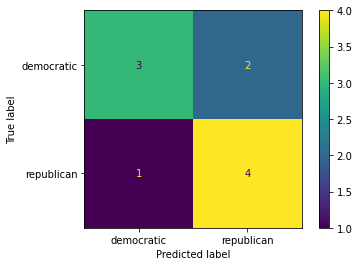

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=docs_data.target_names).plot()